### Histograma

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from scipy import stats as scipy
%matplotlib inline

In [4]:
#Distâncias em km entre casa e trabalho 
km = pd.Series([4,6,6,7,11,13,18,19,21,24,26,27,35,36,36,36,42,43,45,49])

In [5]:
#Criar lista com ticks do eixo x
def lista_ticks(barras, serie):
    intervalo_ticks = ((serie.max() - serie.min()) / barras) #Intervalo ideal
    ticks = []
    x = serie.min()
    while x <= serie.max():
        ticks.append(x)
        x += intervalo_ticks
    return ticks

#Criar lista com frequencia_relativa
def lista_freq_rel(serie, yticks):
    lista_freq = []
    for x in yticks:
        valor = x / len(serie)
        lista_freq.append(pct(x))
    return lista_freq

#Criar histograna
def gera_hist(barras, data, titulo, unidade):
    ticks = lista_ticks(barras, data)
    ax = data.plot.hist(bins=barras, rwidth=0.95)
    yticks = ax.get_yticks()
    #freq_rel = lista_freq_rel(data, yticks)
    #ax.set_yticklabels(freq_rel)
    
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    fig.set_dpi(150)
    
    plt.xticks(ticks)
    plt.title(titulo)
    plt.xlabel(unidade)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.30)
    plt.show()
    return

#Transformar decimal em porcentagem
def pct(x):
    valor = "{0:.2f}%".format(x*100)
    return valor

In [6]:
#Média, mediana e moda
print("Média Aritmética: ", stats.mean(km))
print("Médiana: ", stats.median(km))
print("Moda: ", stats.mode(km))

Média Aritmética:  25.2
Médiana:  25.0
Moda:  36


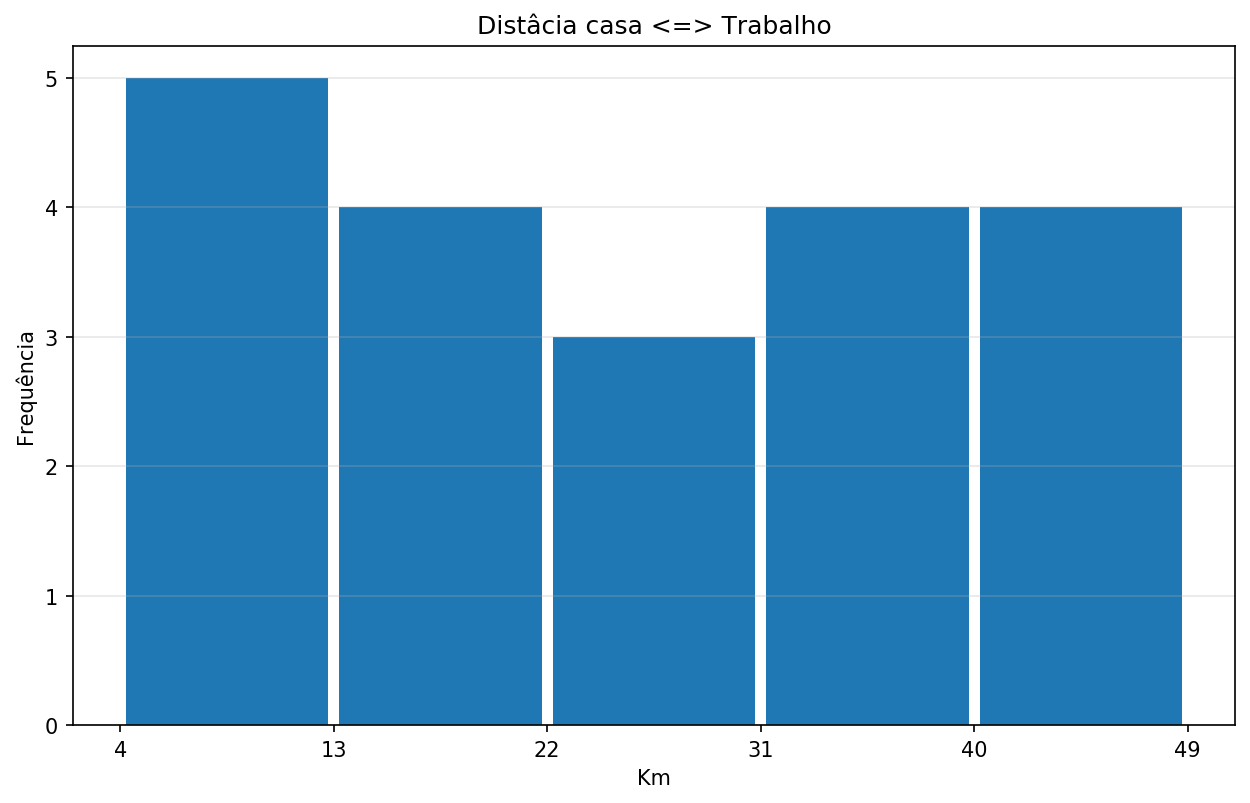

In [7]:
gera_hist(5, km, 'Distâcia casa <=> Trabalho', 'Km')

In [8]:
data = pd.read_csv('DataSets/weight-height.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [10]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
data.columns = ['Sexo', 'Altura', 'Peso']

In [12]:
#Converter de pol para cm
data['Altura_cm'] = data['Altura']*2.54

In [13]:
#Converter de libra para kg
data['Peso_kg'] = data['Peso']*0.453592

In [14]:
data['Altura_cm'] = data['Altura_cm'].round(0)
data['Peso_kg'] = data['Peso_kg'].round(2)

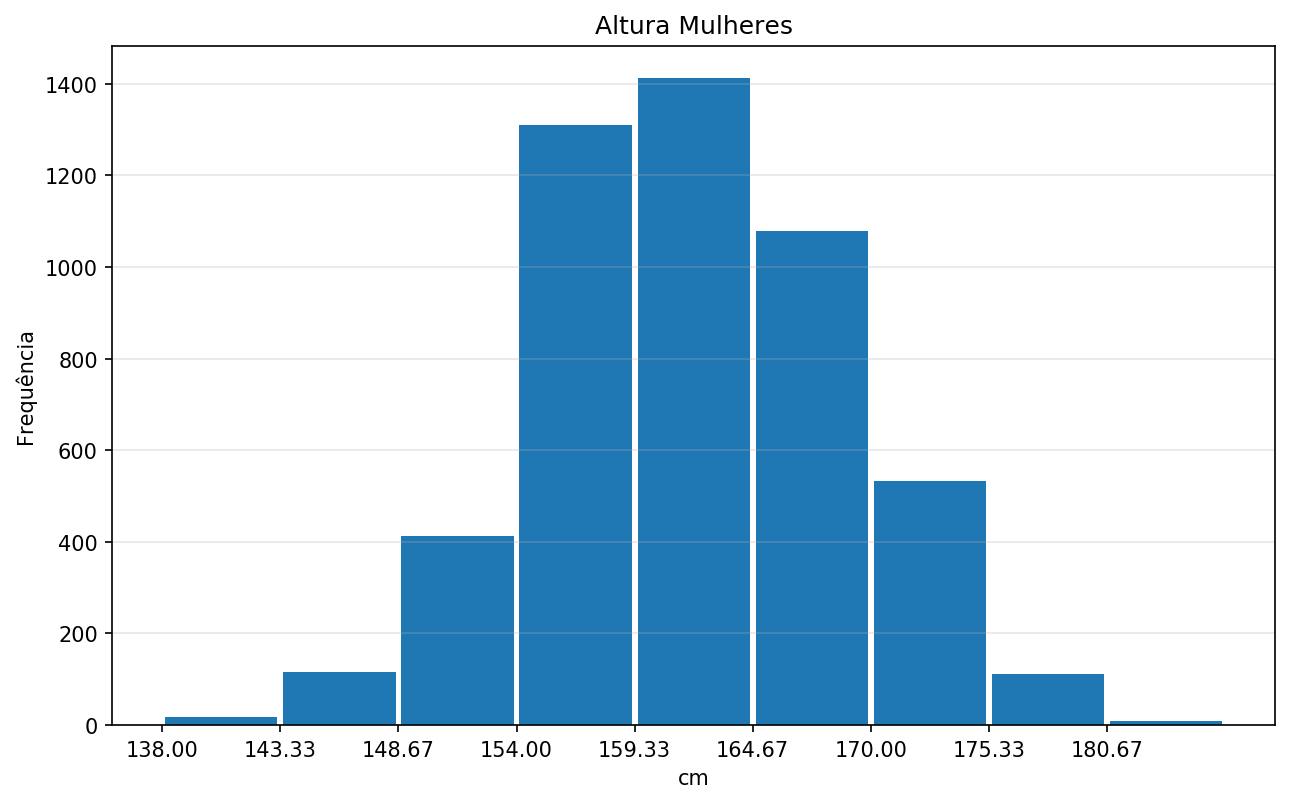

In [15]:
gera_hist(9, data.loc[data['Sexo']=='Female']['Altura_cm'],
          'Altura Mulheres', 'cm')

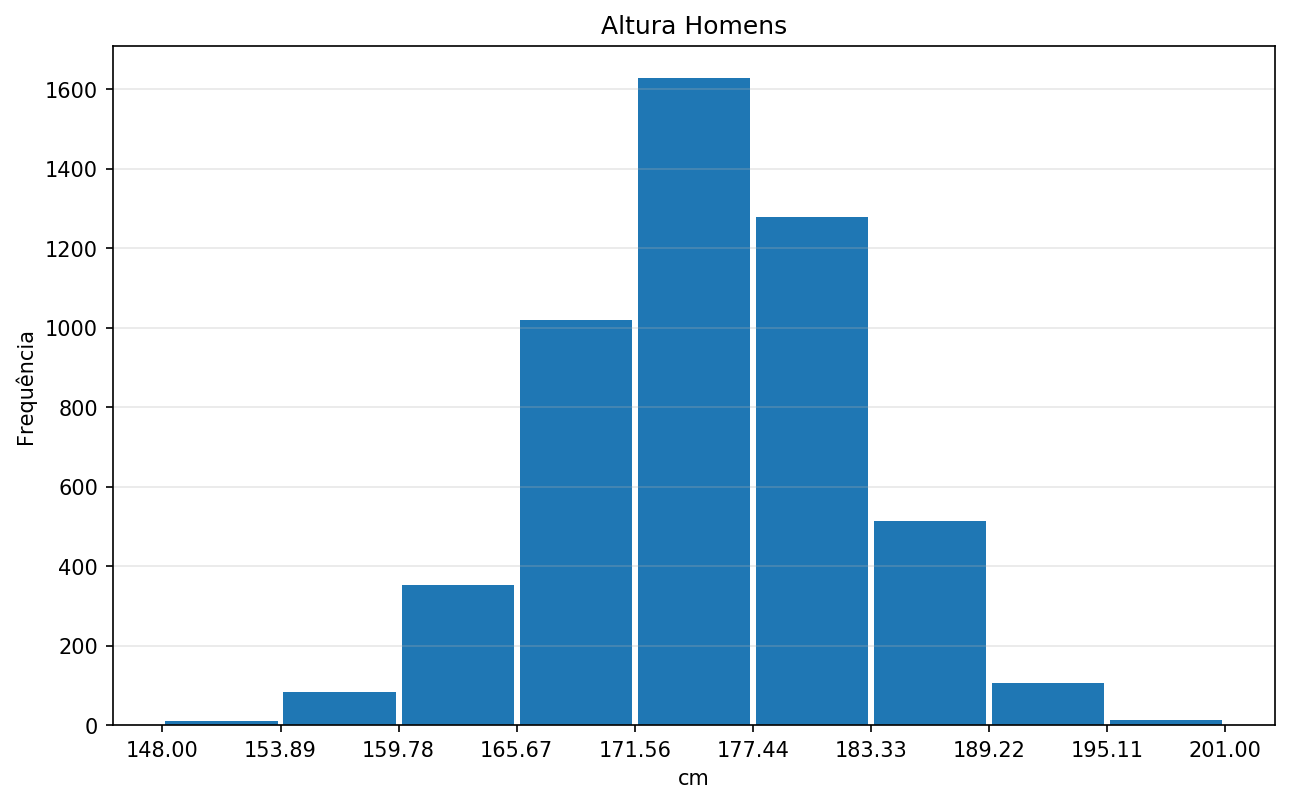

In [16]:
gera_hist(9, data.loc[data['Sexo']=='Male']['Altura_cm'],
          'Altura Homens', 'cm')

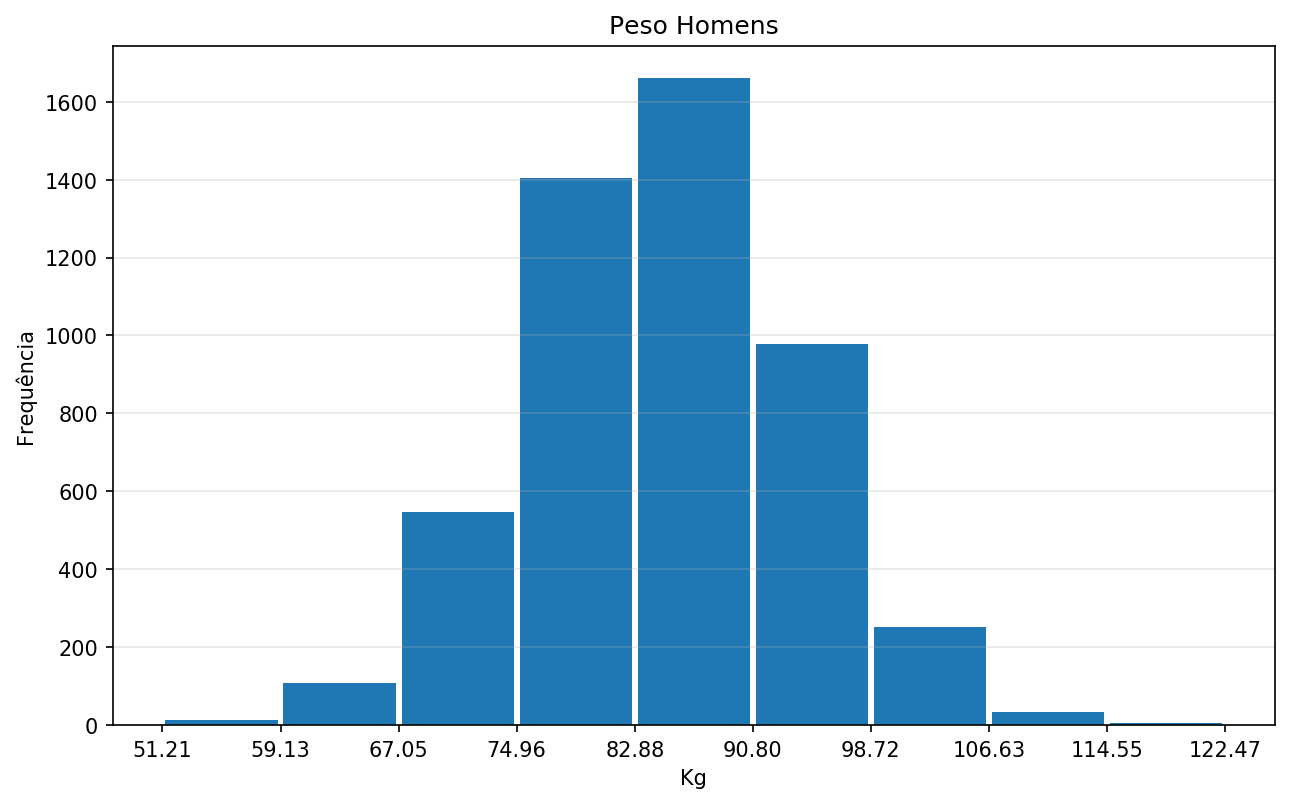

In [17]:
gera_hist(9, data.loc[data['Sexo']=='Male']['Peso_kg'],
         'Peso Homens', 'Kg')

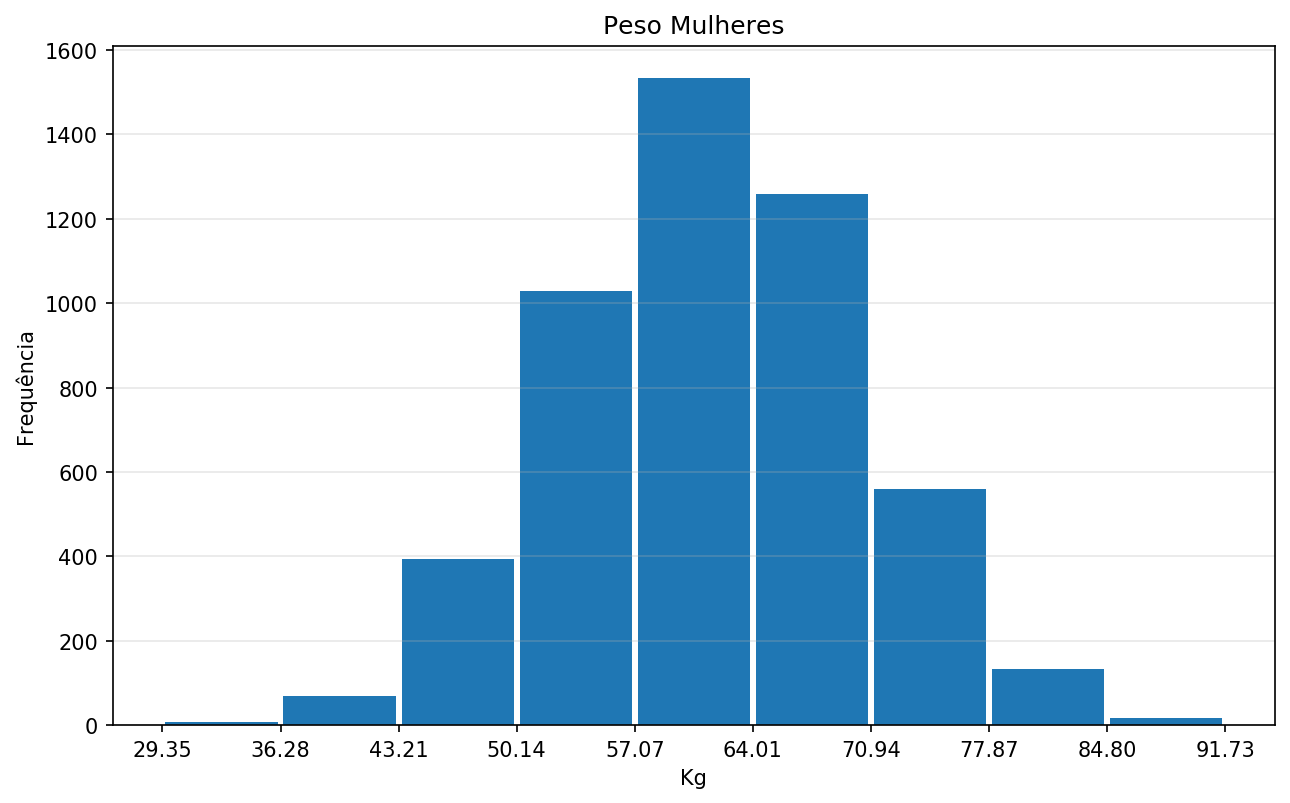

In [18]:
gera_hist(9, data.loc[data['Sexo']=='Female']['Peso_kg'],
         'Peso Mulheres', 'Kg')

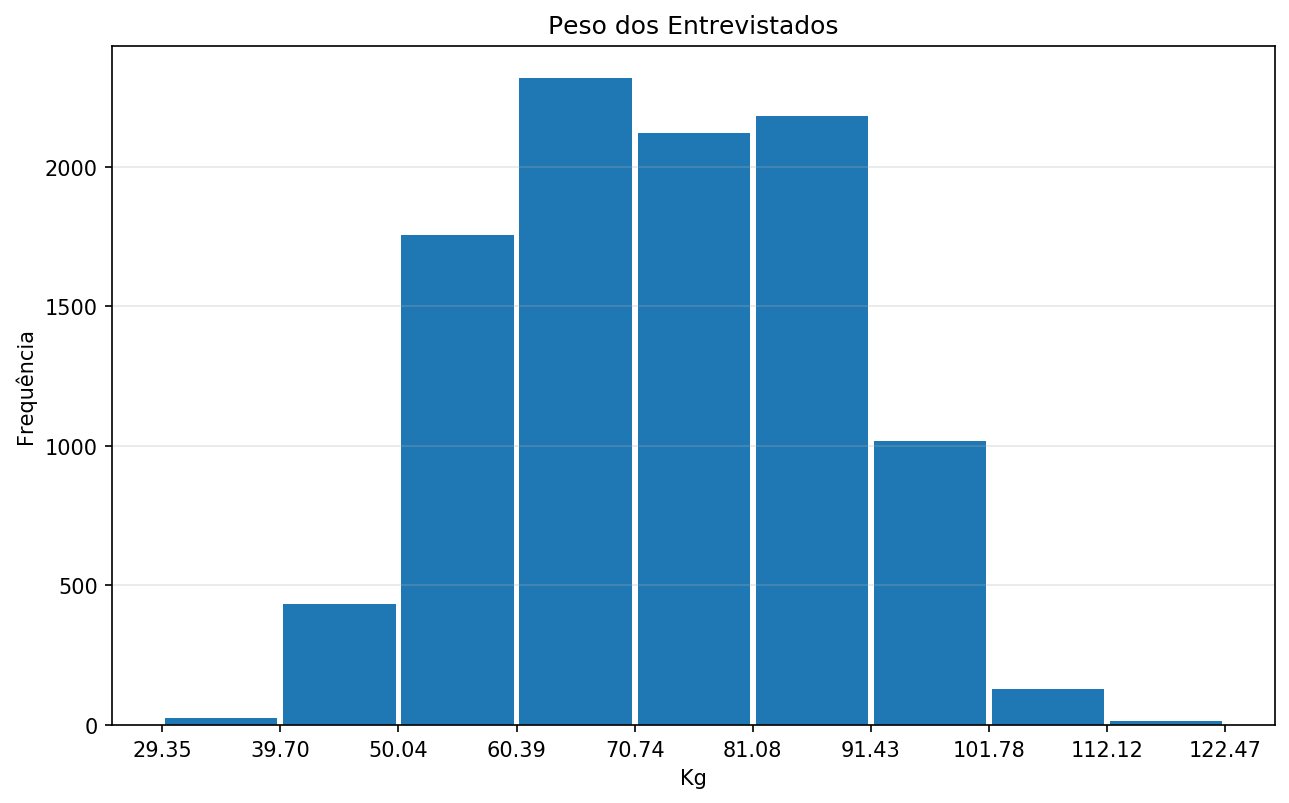

In [19]:
gera_hist(9,data['Peso_kg'],'Peso dos Entrevistados', 'Kg')

## Estatística

In [20]:
#Média, mediana e moda
print("Média Aritmética: ", data.loc[data['Sexo']=='Female']['Altura_cm'].mean())
print("Médiana: ", data.loc[data['Sexo']=='Female']['Altura_cm'].median())
print("Moda: ", data.loc[data['Sexo']=='Female']['Altura_cm'].mode())
print("Variança Populacional: ",
      stats.pvariance(data.loc[data['Sexo']=='Female']['Altura_cm']))
print("Desvio Padrão: ",
      stats.stdev(data.loc[data['Sexo']=='Female']['Altura_cm']))

Média Aritmética:  161.8112
Médiana:  162.0
Moda:  0    162.0
dtype: float64
Variança Populacional:  46.91595456
Desvio Padrão:  6.850207268975559


In [21]:
#Média, mediana e moda
print("Média Aritmética: ", data.loc[data['Sexo']=='Male']['Altura_cm'].mean())
print("Médiana: ", data.loc[data['Sexo']=='Male']['Altura_cm'].median())
print("Moda: ", data.loc[data['Sexo']=='Male']['Altura_cm'].mode())
print("Variança Populacional: ",
      stats.pvariance(data.loc[data['Sexo']=='Male']['Altura_cm']))
print("Desvio Padrão: ",
      stats.stdev(data.loc[data['Sexo']=='Male']['Altura_cm']))

Média Aritmética:  175.327
Médiana:  175.0
Moda:  0    175.0
dtype: float64
Variança Populacional:  53.086071
Desvio Padrão:  7.286747582980188


In [22]:
#Coeficiente de variação
altura_mulheres = data.loc[data['Sexo']=='Female']['Altura_cm']
altura_homens = data.loc[data['Sexo']=='Male']['Altura_cm']
peso_mulheres = data.loc[data['Sexo']=='Female']['Peso_kg']
peso_homens = data.loc[data['Sexo']=='Male']['Peso_kg']
coefvar_alt_mulheres = stats.stdev(altura_mulheres) / stats.mean(altura_mulheres)
coefvar_alt_homens = stats.stdev(altura_homens) / stats.mean(altura_homens)
coefvar_peso_mulheres = stats.stdev(peso_mulheres) / stats.mean(peso_mulheres)
coefvar_peso_homens = stats.stdev(peso_homens) / stats.mean(peso_homens)

print('Coeficiente de variação altura mulheres: ', pct(coefvar_alt_mulheres))
print('Coeficiente de variação altura homens: ', pct(coefvar_alt_homens))
print('Coeficiente de variação peso mulheres: ', pct(coefvar_peso_mulheres))
print('Coeficiente de variação peso homens: ', pct(coefvar_peso_homens))

Coeficiente de variação altura mulheres:  4.23%
Coeficiente de variação altura homens:  4.16%
Coeficiente de variação peso mulheres:  14.00%
Coeficiente de variação peso homens:  10.58%


In [23]:
coefvar_dict = {'homens': {'cv peso': pct(coefvar_peso_homens),
                          'cv altura': pct(coefvar_alt_homens)},
               'mulheres': {'cv peso': pct(coefvar_peso_mulheres),
                           'cv altura': pct(coefvar_alt_mulheres)}}

In [24]:
cv_data = pd.DataFrame.from_dict(coefvar_dict)

In [25]:
cv_data

,homens,mulheres
cv altura,4.16%,4.23%
cv peso,10.58%,14.00%


In [26]:
#Coeficiente de variação usando scipy
round(scipy.stats.variation(data.loc[data['Sexo']=='Male']['Altura_cm'])*100, 2)

4.16

In [27]:
data.head()

,Sexo,Altura,Peso,Altura_cm,Peso_kg
0,Male,73.847017,241.893563,188.0,109.72
1,Male,68.781904,162.310473,175.0,73.62
2,Male,74.110105,212.740856,188.0,96.50
3,Male,71.730978,220.042470,182.0,99.81
4,Male,69.881796,206.349801,177.0,93.60


In [32]:
data.head()

,Sexo,Altura,Peso,Altura_cm,Peso_kg
0,Male,73.847017,241.893563,188.0,109.72
1,Male,68.781904,162.310473,175.0,73.62
2,Male,74.110105,212.740856,188.0,96.50
3,Male,71.730978,220.042470,182.0,99.81
4,Male,69.881796,206.349801,177.0,93.60


In [34]:
#Calcular covariancia e coeficiente de correlação na unha
resultado = 0
for x in range(0,len(data)):
    calculo = (data['Altura_cm'][x] - data['Altura_cm'].mean()) *\
               (data['Peso_kg'][x] - data['Peso_kg'].mean())
    resultado += calculo
resultado = (resultado / (len(data)-1)) / (stats.stdev(data['Altura_cm']) * stats.stdev(data['Peso_kg']))
print('Coeficiente de correlação entre Peso e Altura: ', round(resultado, 2))

Coeficiente de correlação entre Peso e Altura:  0.92


In [35]:
#Calcular coeficiente de correlação usando SciPy
scipy.stats.pearsonr(data['Altura_cm'], data['Peso_kg'])

(0.9244652817157697, 0.0)

In [36]:
#Calcular coeficiente de correlação usando Pandas
data.corr()

,Altura,Peso,Altura_cm,Peso_kg
Altura,1.000000,0.924756,0.999565,0.924756
Peso,0.924756,1.000000,0.924465,1.000000
Altura_cm,0.999565,0.924465,1.000000,0.924465
Peso_kg,0.924756,1.000000,0.924465,1.000000


## Diagrama de Dispersão (ScatterPlot)

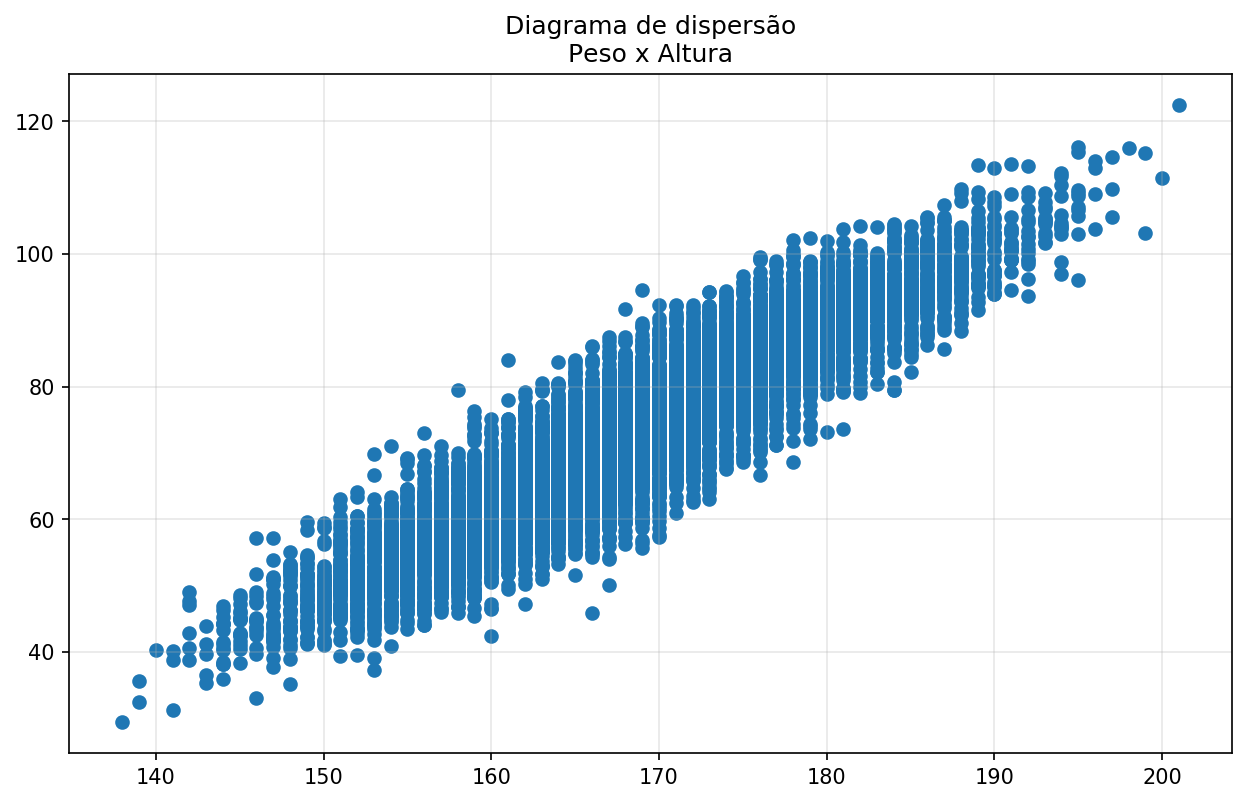

In [37]:
ax = plt.subplot()
plt.scatter(data['Altura_cm'], data['Peso_kg'])
fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_dpi(150)
ax.set_title('Diagrama de dispersão\nPeso x Altura')
plt.grid(alpha=0.30)
plt.show()

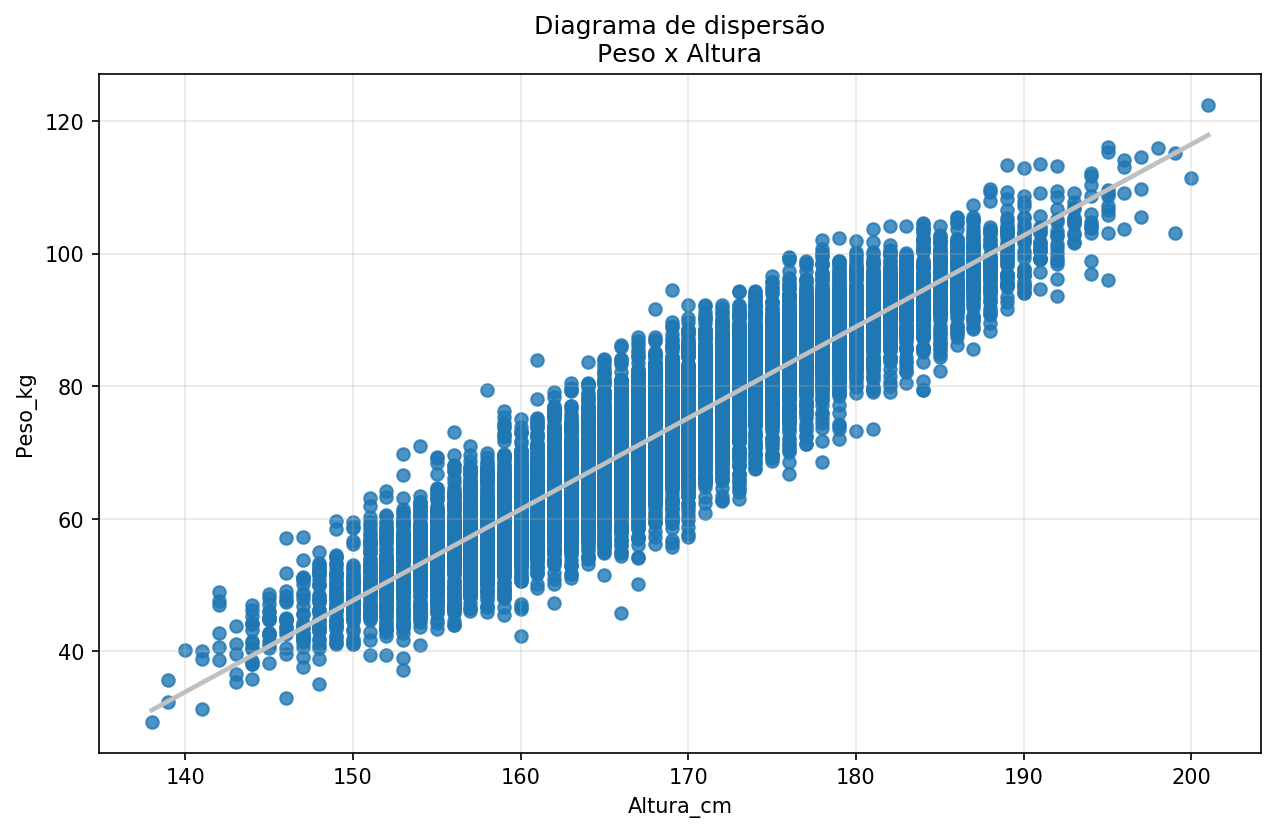

In [38]:
ax = plt.subplot()
sns.regplot(data['Altura_cm'], data['Peso_kg'],
            line_kws={'color':'silver'})
fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_dpi(150)
ax.set_title('Diagrama de dispersão\nPeso x Altura')
plt.grid(alpha=0.30)
plt.show()

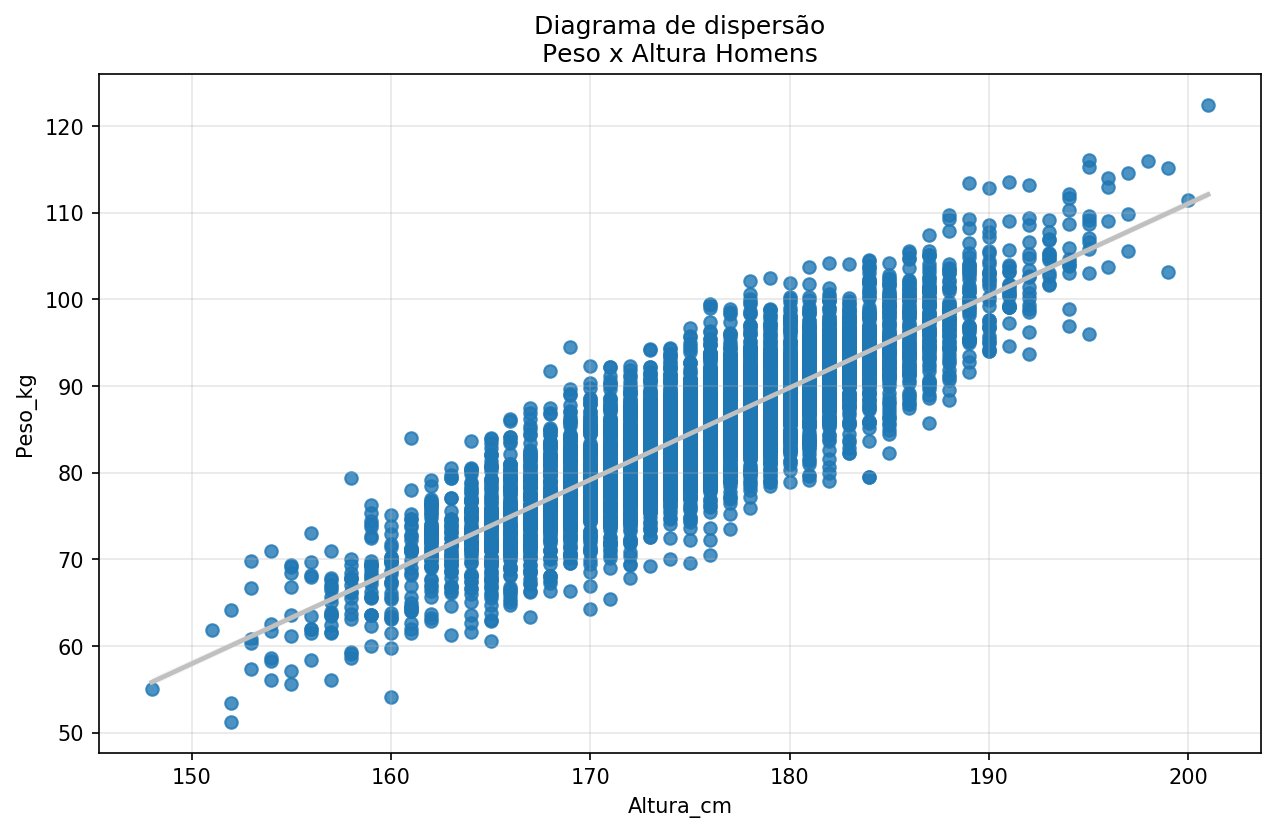

In [39]:
ax = plt.subplot()
sns.regplot(data.loc[data['Sexo'] == 'Male']['Altura_cm'],
            data.loc[data['Sexo'] == 'Male']['Peso_kg'],
            line_kws={'color':'silver'})
fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_dpi(150)
ax.set_title('Diagrama de dispersão\nPeso x Altura Homens')
plt.grid(alpha=0.30)
plt.show()

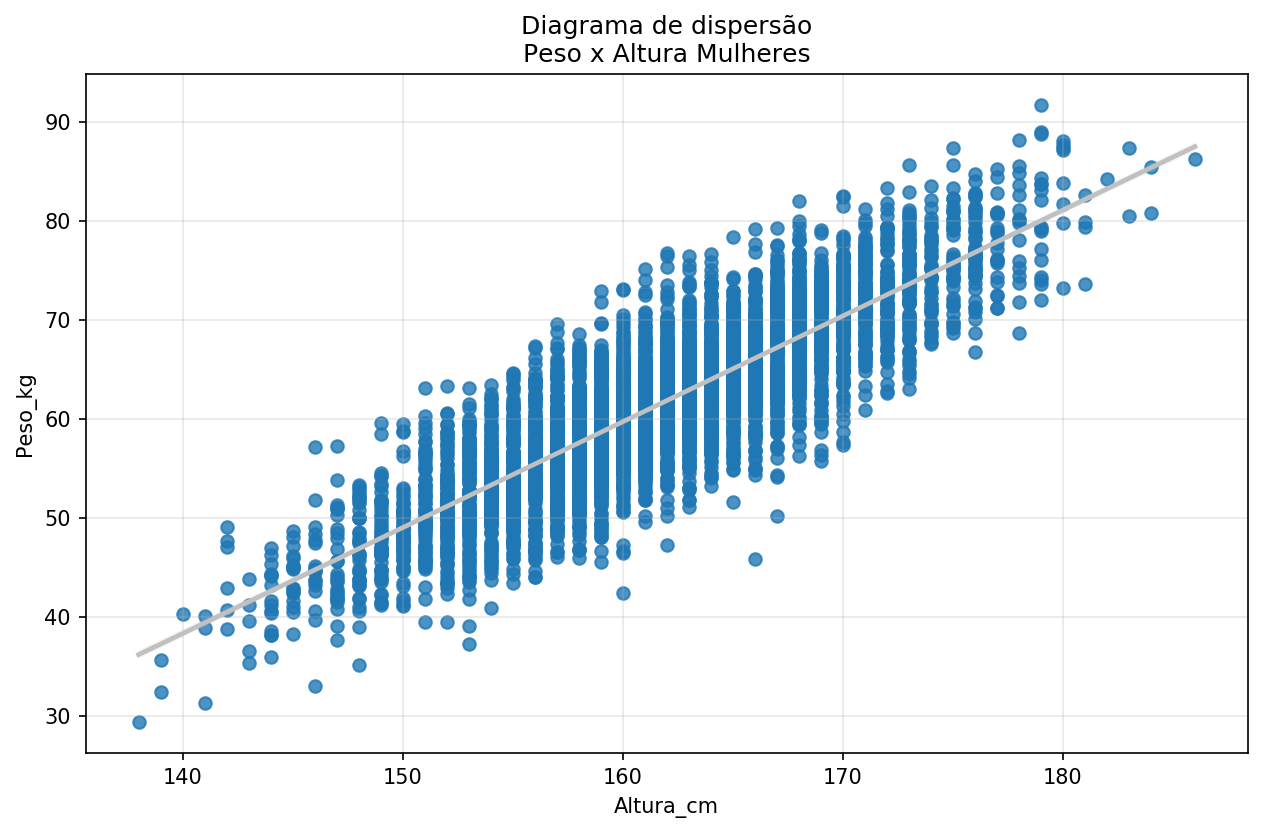

In [40]:
ax = plt.subplot()
sns.regplot(data.loc[data['Sexo'] == 'Female']['Altura_cm'],
            data.loc[data['Sexo'] == 'Female']['Peso_kg'],
            line_kws={'color':'silver'})
fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_dpi(150)
ax.set_title('Diagrama de dispersão\nPeso x Altura Mulheres')
plt.grid(alpha=0.30)
plt.show()

## Teorema do Limite Central

In [72]:
cubo = [1,2,3,4,5,6] #Lados de um dado

In [73]:
np.mean(cubo) # Média população

3.5

In [78]:
lista_jogo = np.random.randint(1,7,40)

In [122]:
medias_amostrais = [np.mean(np.random.randint(1,7,40))for _ in range(1000)]

In [112]:
lista = []
def media_amostras(lista, amostra, num):
    x = 1
    while x <= num:
        lista.append(np.mean(np.random.randint(1,7,amostra)))
        x += 1
        pd.Series(lista)
    return lista
        

In [119]:
teste_tlc10 = media_amostras(lista, 40, 10) #10 amostras
teste_tlc50 = media_amostras(lista, 40, 50) #50 amostras
teste_tlc100 = media_amostras(lista, 40, 100) #100 amostras
teste_tlc150 = media_amostras(lista, 40, 150) #150 amostras
teste_tlc200 = media_amostras(lista, 40, 200) #200 amostras

In [120]:
teste_tlc10 = pd.Series(teste_tlc10)
teste_tlc50 = pd.Series(teste_tlc50)
teste_tlc100 = pd.Series(teste_tlc100)
teste_tlc150 = pd.Series(teste_tlc150)
teste_tlc20 = pd.Series(teste_tlc200)

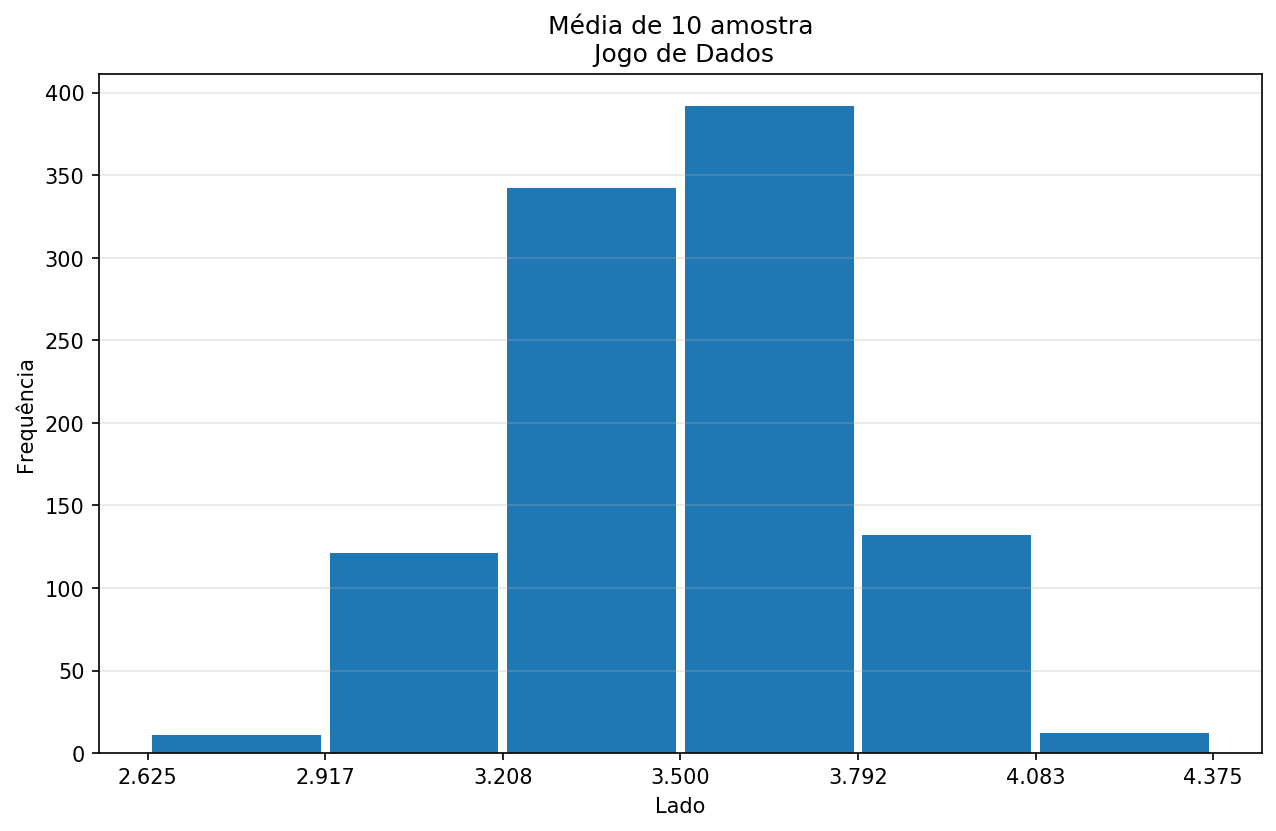

In [121]:
gera_hist(6,teste_tlc10,'Média de 10 amostra\n Jogo de Dados',
          'Lado') #50 amostras

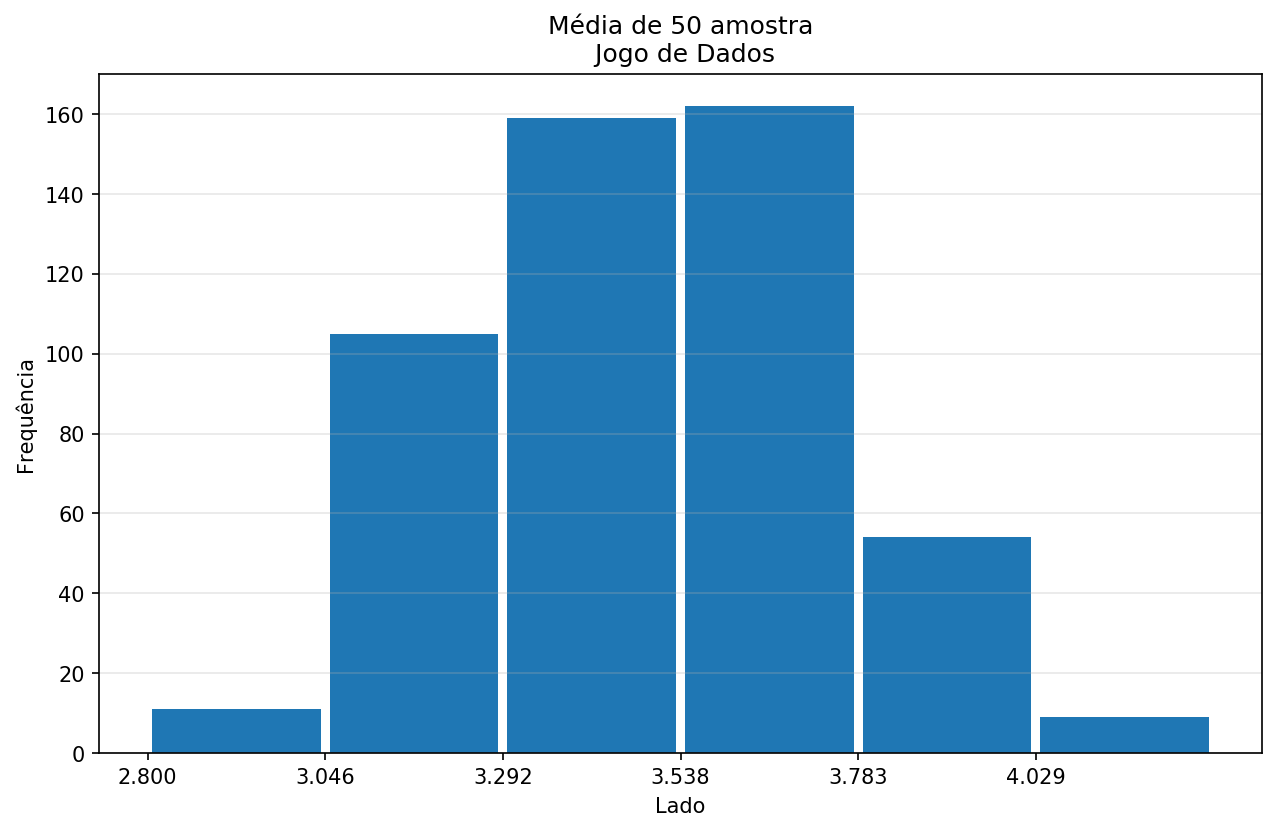

In [115]:
gera_hist(6,teste_tlc50,'Média de 50 amostra\n Jogo de Dados',
          'Lado') #50 amostras

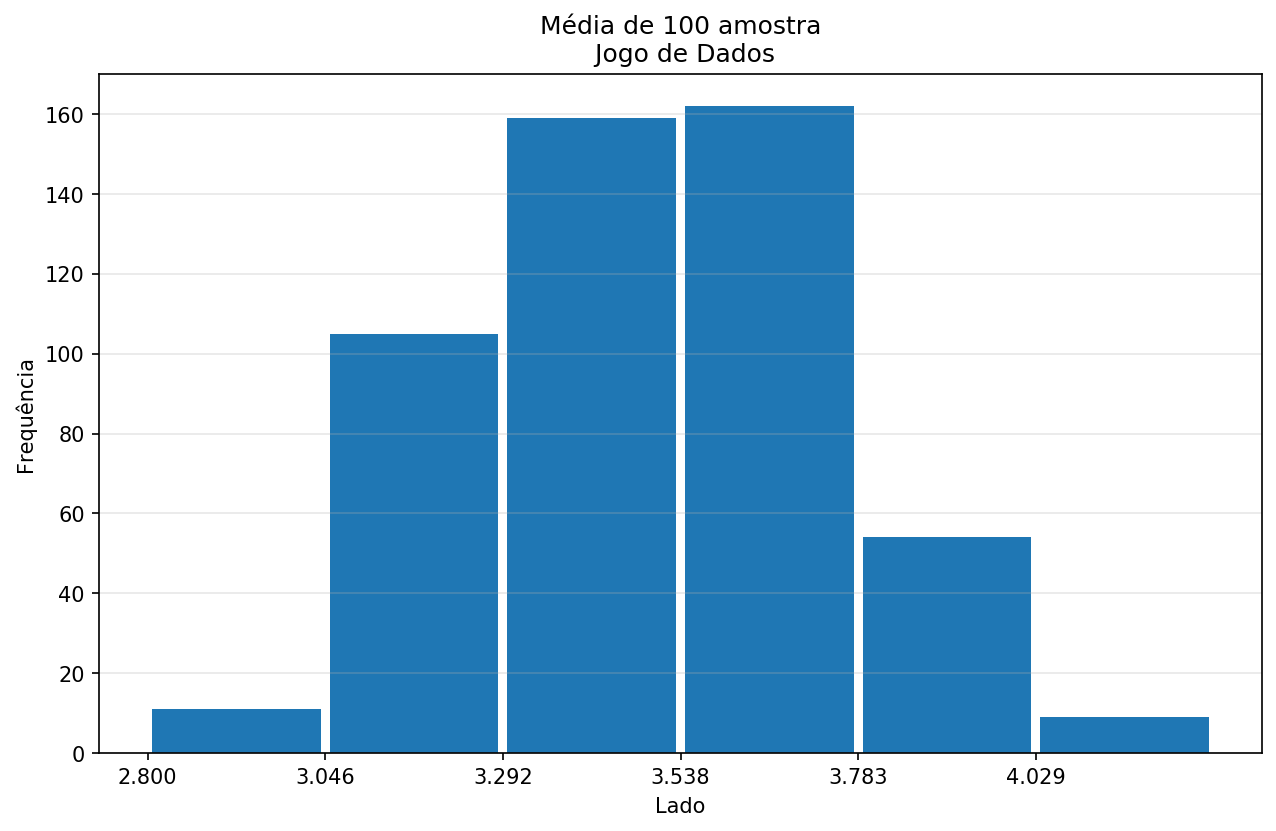

In [116]:
gera_hist(6,teste_tlc100,'Média de 100 amostra\n Jogo de Dados',
          'Lado') #100 amostras

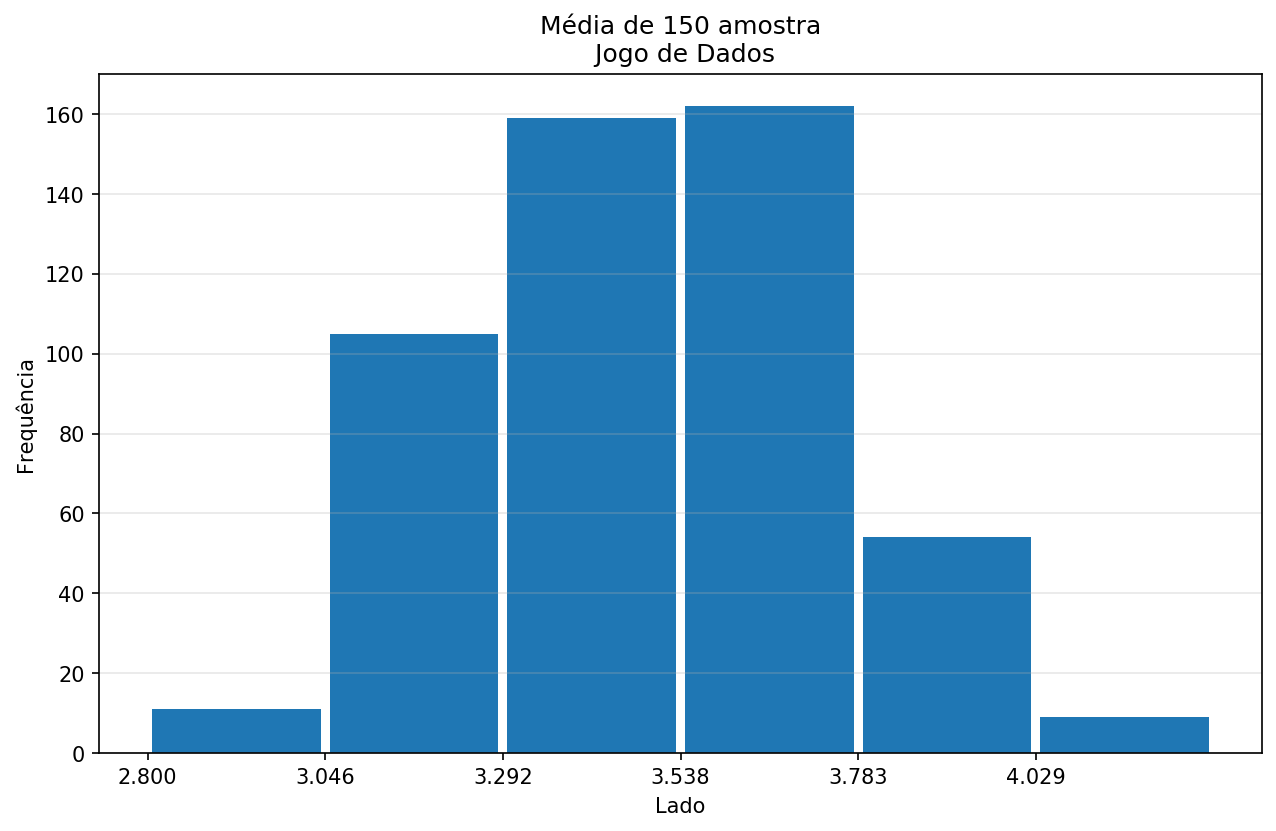

In [117]:
gera_hist(6,teste_tlc150,'Média de 150 amostra\n Jogo de Dados',
          'Lado') #150 amostras

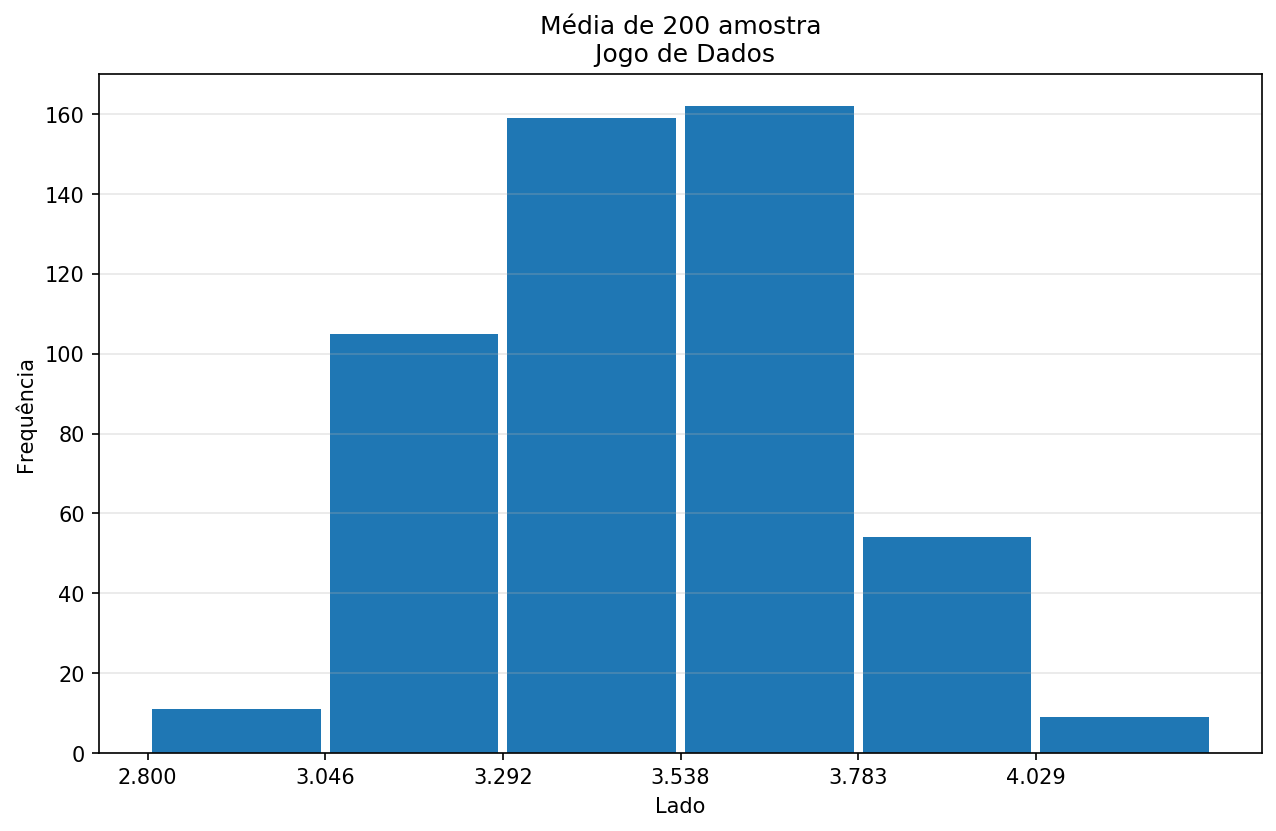

In [118]:
gera_hist(6,teste_tlc50,'Média de 200 amostra\n Jogo de Dados',
          'Lado') #200 amostras

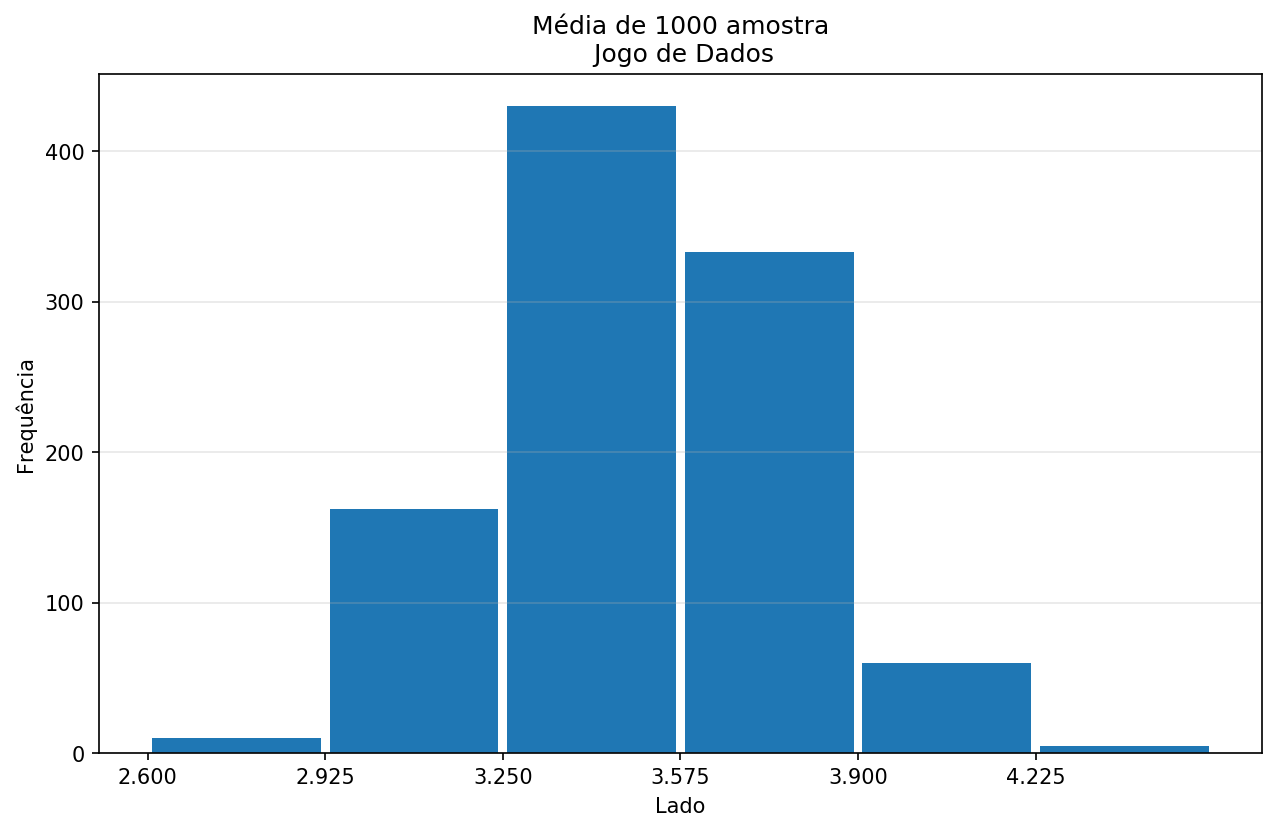

In [124]:
medias_amostrais = pd.Series(medias_amostrais)
gera_hist(6,medias_amostrais,'Média de 1000 amostra\n Jogo de Dados',
          'Lado') #200 amostras

In [126]:
medias_amostrais.mode()

0    3.55
dtype: float64